![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
## MAM4 - EDP1
# TP 2 - Équation de la chaleur en deux dimensions

Le but de cette séance est la simulation numérique du Laplacien dans un domaine cartesien et la prise en compte des conditions en limites de Dirichlet et Neumann 

On va se donner un exemple simple: l'implementation numérique d'un Laplacien dans un domaine en forme de L avec des conditions aux limites de Dirichlet homogène. 

La fonction laplacian construit la matrice du laplacien en 2d en partant d'une grille de points donnée par la matrice G.

In [1]:
using SparseArrays

# Discrete 2D Laplacian - works with arbitrary ordering of interior nodes
function laplacian(G; Δx=1.0, Δy=1.0)
    ij = findall(G .≠ 0)
    K = length(ij)
    p = sortperm(G[ij])
    ij = ij[p] # ij is reordered so that G[ij[k]] = k
    Δ = spzeros(K, K)
    for k = 1:K
        Δ[k, k] = -2/Δx^2-2/Δy^2
        ijₖ = ij[k]
        kW = G[ijₖ + CartesianIndex(0, -1)]
        if kW ≠ 0 Δ[k, kW] = 1/Δx^2 end
        kE = G[ijₖ + CartesianIndex(0,  1)]
        if kE ≠ 0 Δ[k, kE] = 1/Δx^2 end
        kN = G[ijₖ + CartesianIndex(-1, 0)]
        if kN ≠ 0 Δ[k, kN] = 1/Δy^2 end
        kS = G[ijₖ + CartesianIndex( 1, 0)]
        if kS ≠ 0 Δ[k, kS] = 1/Δy^2 end
    end
    return Δ
end

laplacian (generic function with 1 method)

On peut se donner la grille de calcul G sous la forme d'une matrice de 1 et 0 et la visualiser

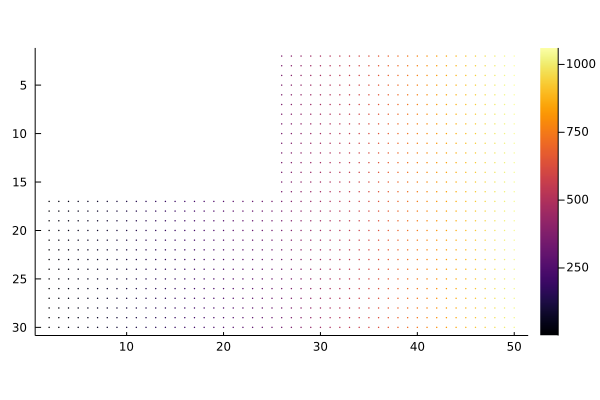

In [27]:
using Random, LinearAlgebra, Plots; gr()

# Grid generation
N = 50
x = range(0, 1.5, length=N+1)
Δx = x[2]-x[1]
M = 30
y = range(0, 1, length=M+1)
Δy = y[2]-y[1]
G = zeros(Int, M+1, N+1)
G[2:M÷2, 2:end-1] .= 1
G[M÷2+1:end-1, N÷2+1:end-1] .= 1 # L-shaped
ij = findall(G .≠ 0)
K = length(ij)
G[ij] = 1:K # columnwise ordering of interior nodes
#G[ij] = randperm(K) # arbitrary ordering of interior nodes
spy(G[end:-1:1, :])


## Question 1
Changer la forme du domaine, ses dimensions, le nombre de points et afficher le résultat.

On peut résoudre le problème $-\Delta  u = f$ sur le domaine précédent pour un sécond membre donné.
On va afficher le résultat et aussi la "sparsité" de la matrice (en localisant les éléments non nuls)

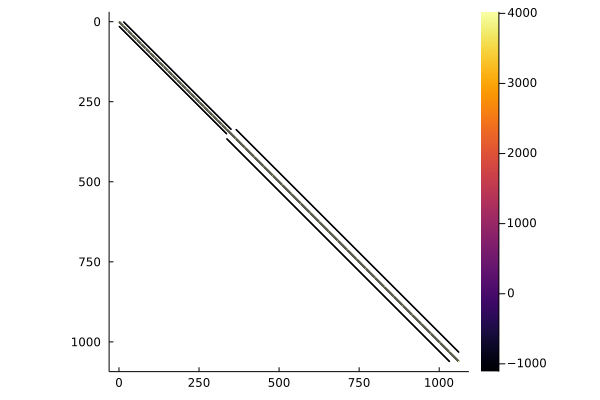

In [28]:
# Assembly and solve
A = -laplacian(G, Δx=Δx, Δy=Δy)
b = ones(K) # heating
F = lu(A) # LU factorisation of sparse A (not assuming any symmetry)
u = F\b
U = zeros(size(G))
U[ij] = u[G[ij]]
spy(A)

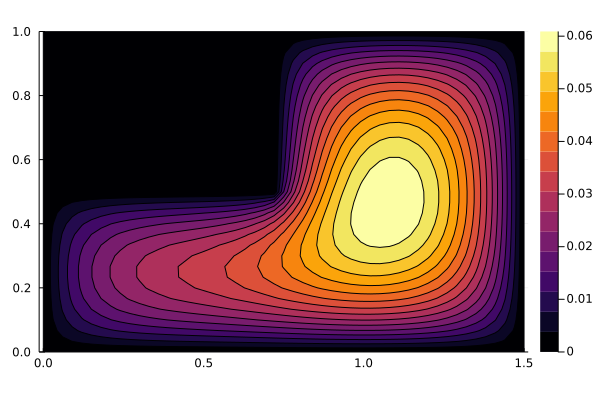

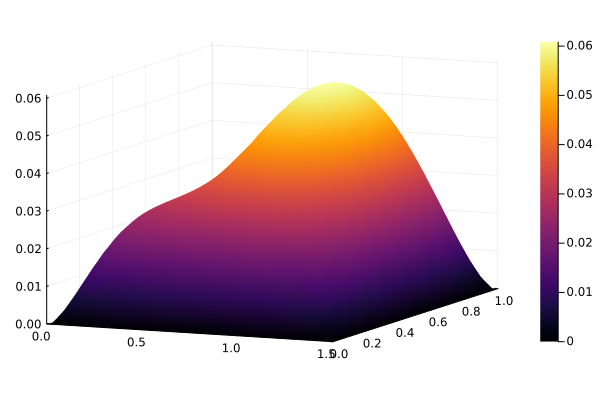

In [29]:
# Plots
p1 = contour(x, y, U, fill=true, aspect_ratio=:equal)
display(p1)
p2 = plot(x, y, U, st=:surface, aspect_ratio=:equal)
display(p2)

# Question 2
Dans un premier temps on va faire tourner ce code pour différentes valeurs du second membre et nombre de points de discretisation. Ensuite en va "localiser" le second membre dans une partie du domaine. Pour ce faire on va construire une nouvelle matrice $H$ ayant la même structure que $G$ dans laquelle on va préciser l'ensemble des points (un petit carré a l'intérieur par exemple ou le long des murs) ou $H$ est non nul.
Le second membre $b$ sera donc non-nul en ces points. (source de chaleur)

# Question 3

Ensuite il va falloir modifier ce code pour prendre en compte:

- les conditions aux limites de Dirichlet non-homogènes (de type fenêtre ou porte d'entrée) sur une partie de la frontière en modifiant le second membre. 
- les conditions aux limites de Neumann homogènes (de type murs isolants)

# Question 4

On va finir par faire une simulation instationnaire (chaleur) avec un schéma implicite/explicite ou Crank-Nicolson pour la configuration précédent en utilisant la matrice du Laplacien.